<a href="https://colab.research.google.com/github/jkabila/Dataset10/blob/main/Dataset10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import vega_datasets
import matplotlib.pyplot as plt
np.bool = np.bool_
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
dir(vega_datasets.data)

['7zip',
 'airports',
 'annual_precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2_concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare_dependencies',
 'flights_10k',
 'flights_200k',
 'flights_20k',
 'flights_2k',
 'flights_3m',
 'flights_5k',
 'flights_airport',
 'gapminder',
 'gapminder_health_income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa_electricity',
 'iris',
 'jobs',
 'la_riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal_2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle_temps',
 'seattle_weather',
 'sf_temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment_across_industries',
 'uniform_2d',
 'us_10m',
 'us_employment',
 'us_state_capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [3]:
df=vega_datasets.data.driving()

In [4]:
df

,side,year,miles,gas
0,left,1956,3675,2.38
1,right,1957,3706,2.40
2,bottom,1958,3766,2.26
3,top,1959,3905,2.31
4,right,1960,3935,2.27
5,bottom,1961,3977,2.25
6,right,1962,4085,2.22
7,bottom,1963,4218,2.12
8,bottom,1964,4369,2.11
9,bottom,1965,4538,2.14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   side    55 non-null     object 
 1   year    55 non-null     int64  
 2   miles   55 non-null     int64  
 3   gas     55 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,55.0,1983.000000,16.020820,1956.00,1969.500,1983.00,1996.50,2010.00
miles,55.0,7164.909091,2160.081671,3675.00,5291.500,6943.00,9304.00,10067.00
gas,55.0,2.165091,0.458002,1.39,1.775,2.14,2.37,3.31


In [7]:
df.isnull().sum()

side     0
year     0
miles    0
gas      0
dtype: int64

In [8]:
df.dtypes

side      object
year       int64
miles      int64
gas      float64
dtype: object

In [9]:
#duplicate checking
df[df.duplicated()==True]

,side,year,miles,gas


In [10]:
#null values checking
df.isnull().sum()

side     0
year     0
miles    0
gas      0
dtype: int64

In [11]:
df['side'].value_counts()

side
right     19
bottom    17
left      12
top        7
Name: count, dtype: int64

In [12]:
df["year"].value_counts()

year
1956    1
1997    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1998    1
1984    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
1985    1
1983    1
1957    1
1969    1
1958    1
1959    1
1960    1
1961    1
1962    1
1963    1
1964    1
1965    1
1966    1
1967    1
1968    1
1970    1
1982    1
1971    1
1972    1
1973    1
1974    1
1975    1
1976    1
1977    1
1978    1
1979    1
1980    1
1981    1
2010    1
Name: count, dtype: int64

In [13]:
df["miles"].value_counts()

miles
3675     1
9416     1
7558     1
7770     1
8089     1
8397     1
8529     1
8535     1
8662     1
8855     1
8909     1
9150     1
9192     1
9590     1
7130     1
9687     1
9717     1
9699     1
9814     1
9868     1
9994     1
10067    1
10037    1
10025    1
9880     1
9657     1
7323     1
6943     1
3706     1
5207     1
3766     1
3905     1
3935     1
3977     1
4085     1
4218     1
4369     1
4538     1
4676     1
4827     1
5038     1
5376     1
6835     1
5617     1
5973     1
6154     1
5943     1
6111     1
6389     1
6630     1
6883     1
6744     1
6672     1
6732     1
9596     1
Name: count, dtype: int64

In [14]:
df["gas"].value_counts()

gas
2.14    4
2.38    2
2.31    2
3.30    2
2.36    2
1.60    2
1.76    2
1.65    1
1.75    1
1.88    1
1.78    1
1.69    1
1.59    1
1.67    1
1.50    1
1.39    1
1.89    1
1.77    1
1.64    1
1.86    1
2.53    1
2.79    1
2.95    1
3.31    1
1.68    1
2.66    1
2.48    1
2.40    1
2.26    1
2.27    1
2.25    1
2.22    1
2.12    1
2.11    1
2.13    1
2.07    1
2.01    1
1.93    1
1.87    1
1.90    1
2.34    1
2.32    1
2.23    1
2.68    1
2.92    1
2.61    1
Name: count, dtype: int64

In [15]:
#numerical
num=df.select_dtypes(include=[np.number], exclude=[np.bool]).columns

In [16]:
#cat
cats = df.select_dtypes(exclude=[np.number]).columns

In [17]:
num

Index(['year', 'miles', 'gas'], dtype='object')

In [18]:
cats

Index(['side'], dtype='object')

In [19]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
year,55.0,1983.000000,16.020820,1956.00,1969.500,1983.00,1996.50,2010.00
miles,55.0,7164.909091,2160.081671,3675.00,5291.500,6943.00,9304.00,10067.00
gas,55.0,2.165091,0.458002,1.39,1.775,2.14,2.37,3.31


In [20]:
df[cats].describe().T

,count,unique,top,freq
side,55,4,right,19


**EDA**

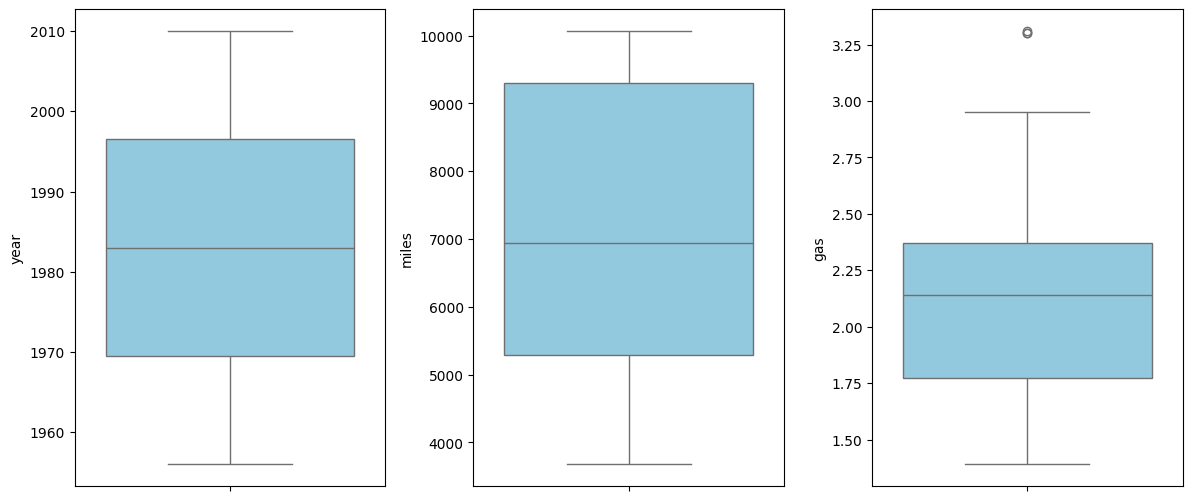

In [21]:
plt.figure(figsize=(20,15))
features=num
for i in range (0, len(features)):
  plt.subplot(3,5,i+1)
  sns.boxplot(y=df[features[i]],color='skyblue')
  plt.tight_layout()


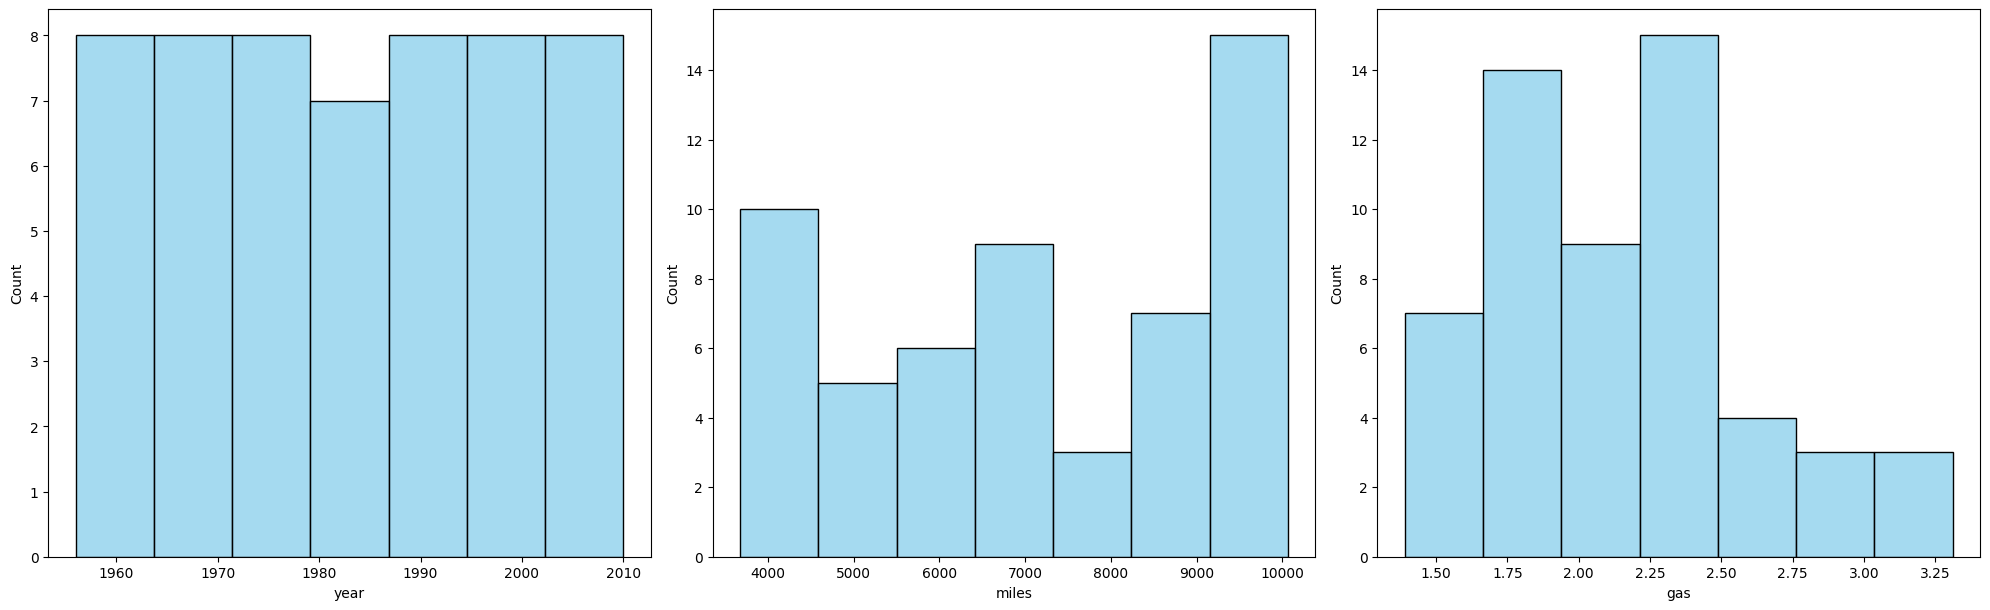

In [22]:
plt.figure(figsize=(20,30))
for i in range(0,len(features)):
  plt.subplot(5,3,i+1)
  sns.histplot(x=df[features[i]],color="skyblue")
  plt.xlabel(features[i])
  plt.tight_layout()

**Encode**

In [23]:
df.head()

,side,year,miles,gas
0,left,1956,3675,2.38
1,right,1957,3706,2.40
2,bottom,1958,3766,2.26
3,top,1959,3905,2.31
4,right,1960,3935,2.27


In [24]:
df['side'].unique()

array(['left', 'right', 'bottom', 'top'], dtype=object)

In [25]:
df['side']=df['side'].map({'top':1,'bottom':0,'right':3,"left":4})

**K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

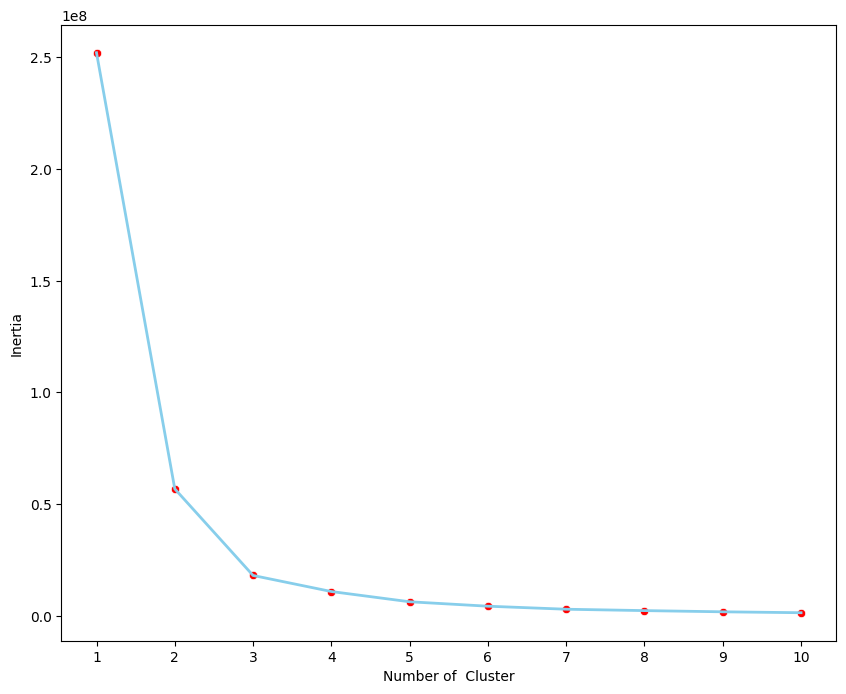

In [28]:
# determining the number of clusters
inertia=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=0)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,11),y=inertia,color="skyblue",linewidth=2)
sns.scatterplot(x=range(1,11),y=inertia,color="red")
plt.xticks(range(1,11))
plt.xlabel("Number of  Cluster")
plt.ylabel("Inertia")
plt.show()

In [30]:
# 4 cluster
dff=df.copy()
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(dff)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [32]:
dff["clusters"]=kmeans.labels_
dff

,side,year,miles,gas,clusters
0,4,1956,3675,2.38,0
1,3,1957,3706,2.40,0
2,0,1958,3766,2.26,0
3,1,1959,3905,2.31,0
4,3,1960,3935,2.27,0
5,0,1961,3977,2.25,0
6,3,1962,4085,2.22,0
7,0,1963,4218,2.12,0
8,0,1964,4369,2.11,0
9,0,1965,4538,2.14,0


In [34]:
radar_plot=dff.groupby("clusters").agg("median").reset_index()
radar_plot

,clusters,side,year,miles,gas
0,0,1.0,1962.5,4151.5,2.180
1,1,3.0,2002.5,9708.0,1.875
2,2,3.0,1977.5,6651.0,2.350
3,3,3.0,1990.0,8529.0,1.750


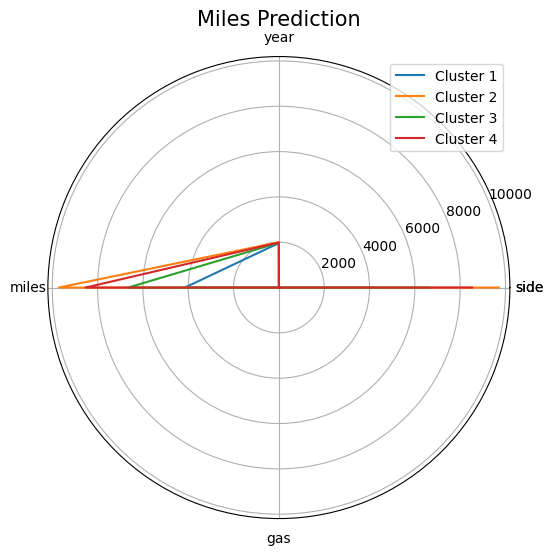

In [40]:
category=['side','year','miles','gas']
categories = [*category, category[0]]
clusters = []

for i in range(0,4):
  nums=[]
  for cat in category:
    nums .append(radar_plot[cat][i])
  nums.append(radar_plot["miles"][i])
  clusters.append(nums)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,4):
    plt.plot(label_loc, clusters[i], label=f'Cluster {i+1}')

plt.title('Miles Prediction', size=15.0, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

<Axes: xlabel='PC 1', ylabel='PC 2'>

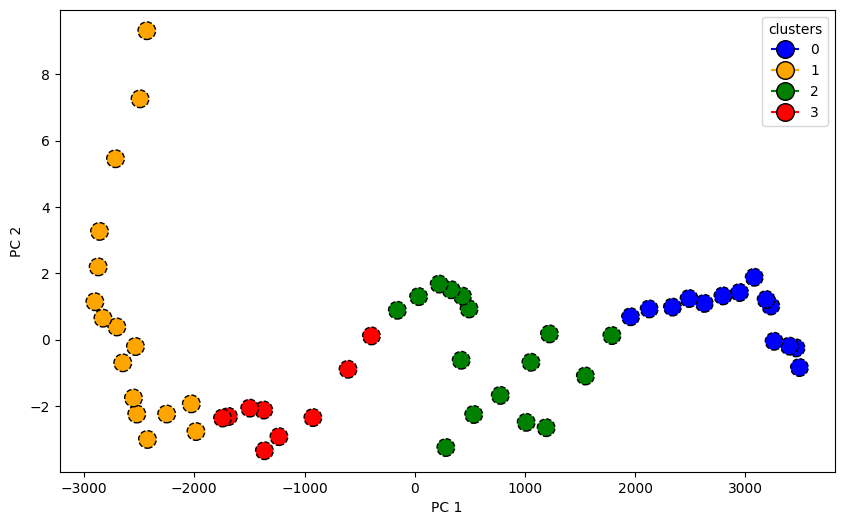

In [41]:
pca = PCA(n_components=2)

pca.fit(dff)
pcs = pca.transform(dff)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = dff['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red'],
    s=160,
    ax=ax
)

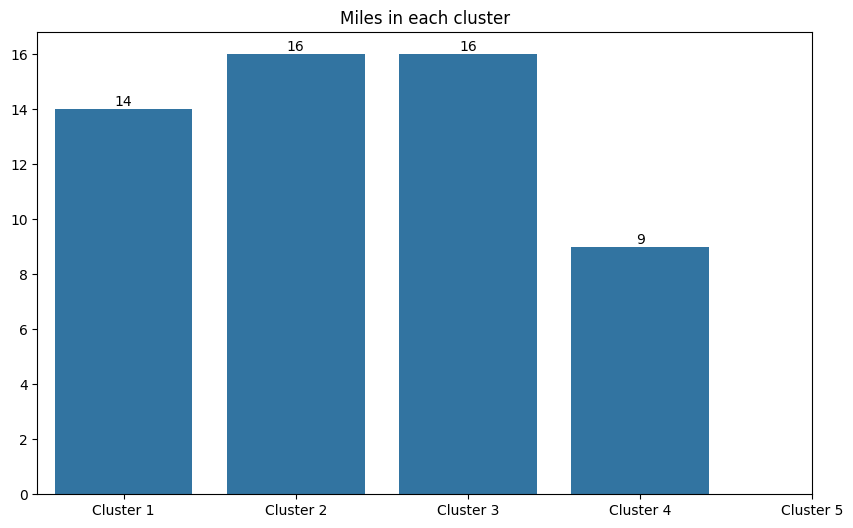

In [49]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=dff["clusters"])

ax.bar_label(ax.containers[0])
plt.xticks([0,1,2,3,4], ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"])
plt.title("Miles in each cluster")
plt.xlabel("")
plt.ylabel("")
plt.show()